<a href="https://colab.research.google.com/github/hammuRawi/Hyperbolic_Decline_Curve_Method/blob/master/decline_curve_analysis_notebook_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 951, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 951 (delta 16), reused 0 (delta 0), pack-reused 915
Receiving objects: 100% (951/951), 24.45 MiB | 34.63 MiB/s, done.
Resolving deltas: 100% (505/505), done.


# Yeni Bölüm


STUDENT NAME:ABDULKADİR

STUDENT SURNAME:ALRAVY

STUDENT NO:160414026

STUDENT DEPARTMENT:PNGE

HİS PROFFESSOR:İBRAHİM KOCABAŞ

LECTURE:Petroleum Property Evaluation & Petroleum Entrepreneurship

HOMEWORK:DECLINE CURVE ANALYSIS

# ** DECLINE CURVE ANALYSIS **
   **ABSTRACT/INTRODUCTION**

    *****       HYPERBOLIC DECLINE CURVE METHOD     *****

 There are 4 well historical production data,to estimate and evaluate Np(oil production in 10 years) ,needing to use decline curve with hyperbolic method because hyperbolic decline curve is the most general decline curveand is applicable to almost any kind of production decline. By that way we can understand which well is more productive and sustainable.

---

**PROCEDURE FOR ESTIMATION BY HYPERBOLIC DECLINE CURVE METHOD**

 Formulation:

Decline rate:Di=qi(1−b)Np[1−(qqi)1−b]

Flow rate:q=qi(1+bDit)−1/b

Cumulative production:Np=qi(1−b)Di[1−(qqi)1−b]

b: hyperbolic exponent (typically between 0 and 1)
 
 **Methods plotting decline curve for python on google colabs**

*   Clone pyreservoir package from github.
*   For using libraries and packages, install them by !pip install scipy,numpy,pandas, and so on in google colabs.
*   Loading python libraries to compute for numerical methods and another features such as statistics, SciPy, NumPy, Matplotlib, Seaborn, Pandas. Each libraries have own properties
*   Importing datas of variables through excel by pandas in .xlsx format
*   Needing to fix datas,there are NaN values , I must select index location not to make error for inputting or for dates, I must arange by date_range for time.
*   Plotting production of wells. 
*   By arps_fit module from pyreservoir package, Plotted hyperbolic decline curve with data curve.
*   Plotting declined oil production in 10 years
*   Plotting cumulative oil production in 10 years(almostly 10 years,but I calculated since declined rate of time)

---

**DISCUSSION**

 Consideration of production rates of the wells,three wells exhibits very productive history (Np is mentioned in below summary part),except one of them which is Well-4. It has two peak of rate. Probably ,this well was stimulated by some tecniques. Thermal , acid or water with alternating gas was injected by injection well because there is no soak time,production was sustained or hydraulic fracturing was applied etc so on. Nevertheless, this well produced oil by injection as primary recovery.


---



 **SUMMARY**
 
   In summary, decline curve calculations shows that 
   
  Forecast of total oil production of Well-1 is 4.817138258101734 MMSTB,

  Forecast of total oil production of Well-2 is 9.201260667463995 MMSTB,

  Forecast of total oil production of Well-3 is 4.684251600946667 MMSTB,

  Forecast of total oil production of Well-4 is 0.291709598995437 MMSTB

since declined rate of time.Therefore the most productive well is Well-2 and the poorest well is Well-4. 

  The general calculated data is in below; 

WELL-1

Initial production rate (qi)  : 7023.41007 VOL/D

Initial decline rate (di)     : 0.00752 VOL/D

Decline coefficient (b)       : 1.58172

RMSE of regression            : 0.00136

------------
WELL-2

Initial production rate (qi)  : 6957.09775 VOL/D

Initial decline rate (di)     : 0.00364 VOL/D

Decline coefficient (b)       : 2.50709

RMSE of regression            : 0.00030

------------
WELL-3

Initial production rate (qi)  : 6249.83415 VOL/D

Initial decline rate (di)     : 0.00370 VOL/D

Decline coefficient (b)       : 1.06977

RMSE of regression            : 0.00066

------------
WELL-4

Initial production rate (qi)  : 1500.57900 VOL/D

Initial decline rate (di)     : 0.00473 VOL/D

Decline coefficient (b)       : -0.08726

RMSE of regression            : 0.00062

---

**REFERANCES**

I have used this libraries to compute functions and found answers to fix mistakes in coding

*   https://cmdlinetips.com/2018/03/probability-distributions-in-python/
*   https://stackoverflow.com/    #for finding asnwers to fix error in coding
*   https://pandas.pydata.org/docs/user_guide/index.html#user-guide
*   https://numpy.org/doc/stable/user/index.html#user
*   https://github.com/yohanesnuwara/pyreservoir






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
import sys
sys.path.append("/content/pyreservoir/dca")

from dca import hyperbolic, arps_fit, arps_bootstrap

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Petroleum/morphoudata.xlsx')

In [ ]:
df['Oil Rate STB/d'] =  pd.to_datetime(df['Oil Rate STB/d'], format='%Y-%m-%d') 

t = df['Oil Rate STB/d']
q = df['Well-1']
q2 = df['Well-2']
q3 = df['Well-3']
q4 = df['Well-4']
print(df.head(33))

   Oil Rate STB/d   Well-1   Well-2   Well-3   Well-4
0      2018-04-15  1887.53      NaN      NaN      NaN
1      2018-05-15  4976.52      NaN      NaN      NaN
2      2018-06-15  6993.07  1840.23      NaN      NaN
3      2018-07-15  5546.35  5349.65      NaN      NaN
4      2018-08-15  5342.35  5901.35   937.26      NaN
5      2018-09-15  4930.00  5489.90  6079.90   382.90
6      2018-10-15  3801.48  6730.42  5674.55  1244.35
7      2018-11-15  3602.90  6907.17  5343.53   994.27
8      2018-12-15  3313.77  6408.23  4937.55   911.00
9      2019-01-16  2901.45  6086.52  4189.42  3010.03
10     2019-02-16  2572.68  5281.11  3680.00  2000.96
11     2019-03-16  2832.61  5213.35  3958.19  1259.61
12     2019-04-16  2687.10  4654.40  3622.03  1365.87
13     2019-05-16  2283.23  4216.06  2969.23  1254.48
14     2019-06-16  2665.20  4585.20  3303.03  1069.87
15     2019-07-16  2326.32  4322.94  3030.35   557.32
16     2019-08-16  2155.00  4365.13  2872.52   447.71
17     2019-09-16  1976.43  

In [ ]:
t1=df['Oil Rate STB/d'].iloc[2:]
t2=df['Oil Rate STB/d'].iloc[7:]
t3=df['Oil Rate STB/d'].iloc[5:]
t4=df['Oil Rate STB/d'].iloc[25:]
t1.head()

2   2018-06-15
3   2018-07-15
4   2018-08-15
5   2018-09-15
6   2018-10-15
Name: Oil Rate STB/d, dtype: datetime64[ns]

In [ ]:
t_all=pd.date_range(start='2018-04-15',end='2027-04-15',periods=10*365)

t_all1=pd.date_range(start='2018-06-15',end='2027-04-15',periods=10*365)
t_all2=pd.date_range(start='2018-11-15',end='2027-04-15',periods=10*365)
t_all3=pd.date_range(start='2018-09-15',end='2027-04-15',periods=10*365)
t_all4=pd.date_range(start='2020-05-17',end='2027-04-15',periods=10*365)
t_all4

DatetimeIndex([          '2020-05-17 00:00:00',
               '2020-05-17 16:36:02.565086325',
               '2020-05-18 09:12:05.130172650',
               '2020-05-19 01:48:07.695258975',
               '2020-05-19 18:24:10.260345300',
               '2020-05-20 11:00:12.825431625',
               '2020-05-21 03:36:15.390517950',
               '2020-05-21 20:12:17.955604275',
               '2020-05-22 12:48:20.520690600',
               '2020-05-23 05:24:23.085776925',
               ...
               '2027-04-08 18:35:36.914223072',
               '2027-04-09 11:11:39.479309408',
               '2027-04-10 03:47:42.044395744',
               '2027-04-10 20:23:44.609482048',
               '2027-04-11 12:59:47.174568384',
               '2027-04-12 05:35:49.739654720',
               '2027-04-12 22:11:52.304741024',
               '2027-04-13 14:47:54.869827360',
               '2027-04-14 07:23:57.434913696',
                         '2027-04-15 00:00:00'],
              dtype=

In [ ]:
q1_loc = df['Well-1'].iloc[2:]
q2_loc = df['Well-2'].iloc[7:]
q3_loc = df['Well-3'].iloc[5:]
q4_loc = df['Well-4'].iloc[25:]
q1_loc

2     6993.07
3     5546.35
4     5342.35
5     4930.00
6     3801.48
7     3602.90
8     3313.77
9     2901.45
10    2572.68
11    2832.61
12    2687.10
13    2283.23
14    2665.20
15    2326.32
16    2155.00
17    1976.43
18    2080.13
19    1873.33
20    2236.32
21    1893.21
22    1988.08
23    1883.71
24    1835.10
25    1868.52
26    1694.70
27    1720.03
28    1620.44
29    1503.14
30    1536.73
31    1428.50
32    1495.31
Name: Well-1, dtype: float64

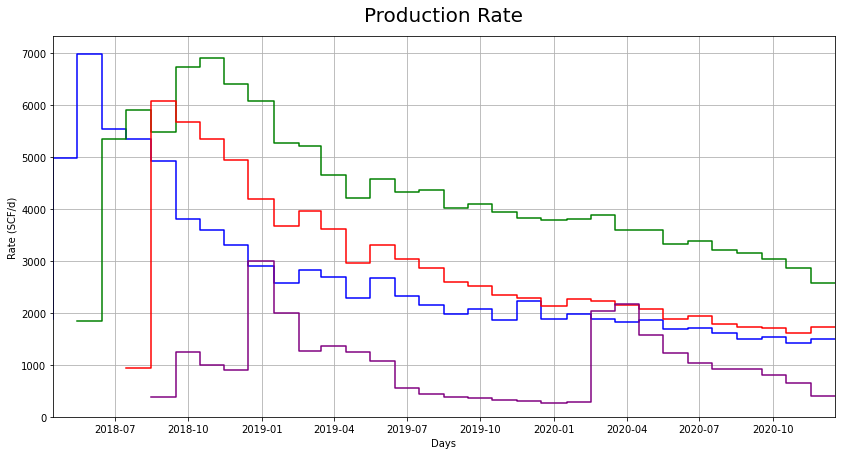

In [ ]:
plt.figure(figsize=(14,7))

plt.step(t, q, color='blue')
plt.step(t,q2,color="green")
plt.step(t,q3,color="red")
plt.step(t,q4,color="purple")
plt.title('Production Rate', size=20, pad=15)
plt.xlabel('Days')
plt.ylabel('Rate (SCF/d)')
plt.xlim(min(t), max(t)); plt.ylim(ymin=0)

plt.grid()
plt.show()

WELL-1
Initial production rate (qi)  : 7023.41007 VOL/D
Initial decline rate (di)     : 0.00752 VOL/D
Decline coefficient (b)       : 1.58172
RMSE of regression            : 0.00136


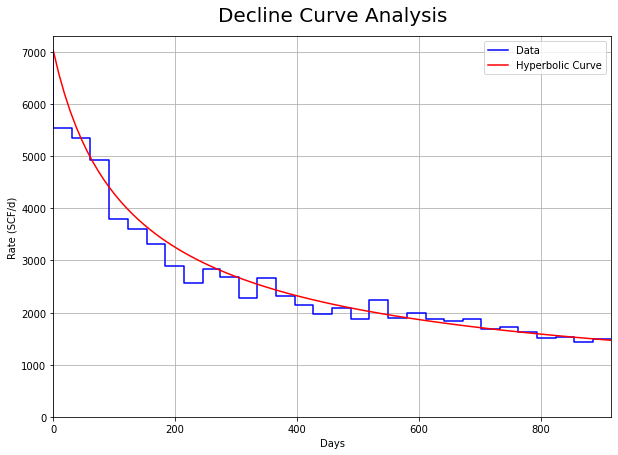

WELL-2
Initial production rate (qi)  : 6957.09775 VOL/D
Initial decline rate (di)     : 0.00364 VOL/D
Decline coefficient (b)       : 2.50709
RMSE of regression            : 0.00030


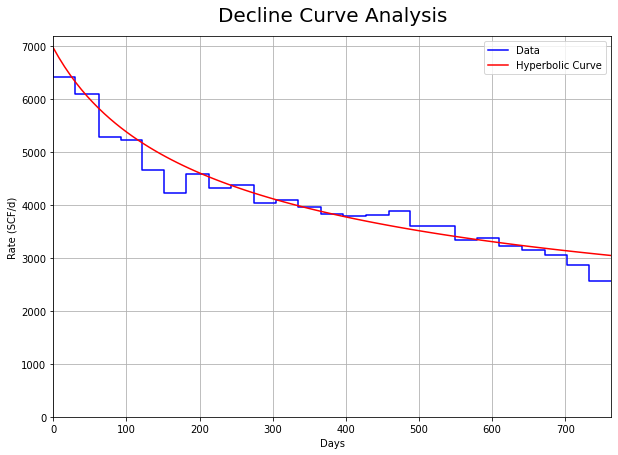

WELL-3
Initial production rate (qi)  : 6249.83415 VOL/D
Initial decline rate (di)     : 0.00370 VOL/D
Decline coefficient (b)       : 1.06977
RMSE of regression            : 0.00066


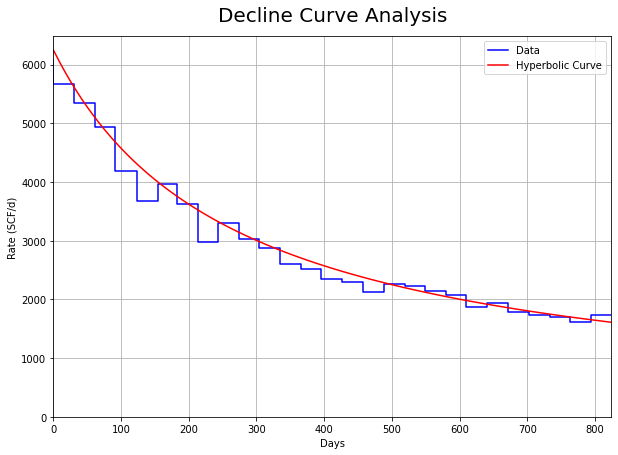

WELL-4
Initial production rate (qi)  : 1500.57900 VOL/D
Initial decline rate (di)     : 0.00473 VOL/D
Decline coefficient (b)       : -0.08726
RMSE of regression            : 0.00062


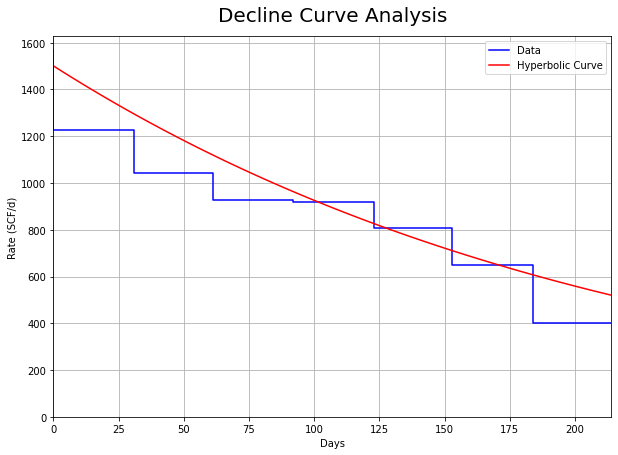

In [ ]:
# Decline curve analysis
print("WELL-1")
qi, di, b, RMSE = arps_fit(t1,q1_loc, plot=True)
print("WELL-2")
qi2, di2, b2, RMSE2 = arps_fit(t2,q2_loc, plot=True)
print("WELL-3")
qi3, di3, b3, RMSE3 = arps_fit(t3,q3_loc, plot=True)
print("WELL-4")
qi4, di4, b4, RMSE4 = arps_fit(t4,q4_loc, plot=True)

In [ ]:
y=[]
for i in range(len(t_all)):
  y.append(qi / (np.abs((1 + b * di * i))**(1/b)))

y2=[]
for i in range(len(t_all)):
  y2.append(qi2 / (np.abs((1 + b2 * di2 * i))**(1/b2)))

y3=[]
for i in range(len(t_all)):
  y3.append(qi3 / (np.abs((1 + b3* di3 * i))**(1/b3)))

y4=[]
for i in range(len(t_all)):
  y4.append(qi4 / (np.abs((1 + b4 * di4 * i))**(1/b4)))


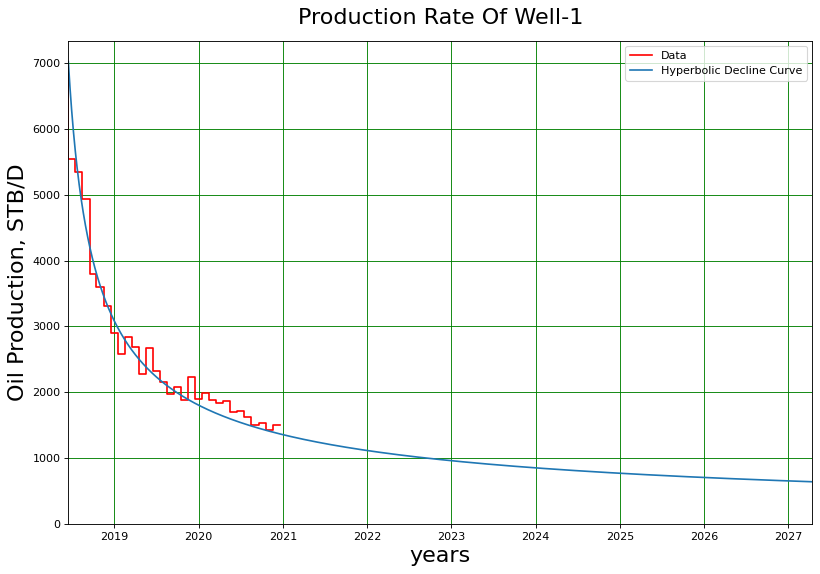

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.step(t1,q1_loc,c="r",label="Data")
plt.plot(t_all1,y,label="Hyperbolic Decline Curve")
plt.title('Production Rate Of Well-1', size=20, pad=15)
plt.xlabel("years",size=20)
plt.ylabel("Oil Production, STB/D",size=20)
plt.xlim(min(t_all1), max(t_all1)); plt.ylim(ymin=0)
plt.grid(color="g")
plt.legend(loc="best")

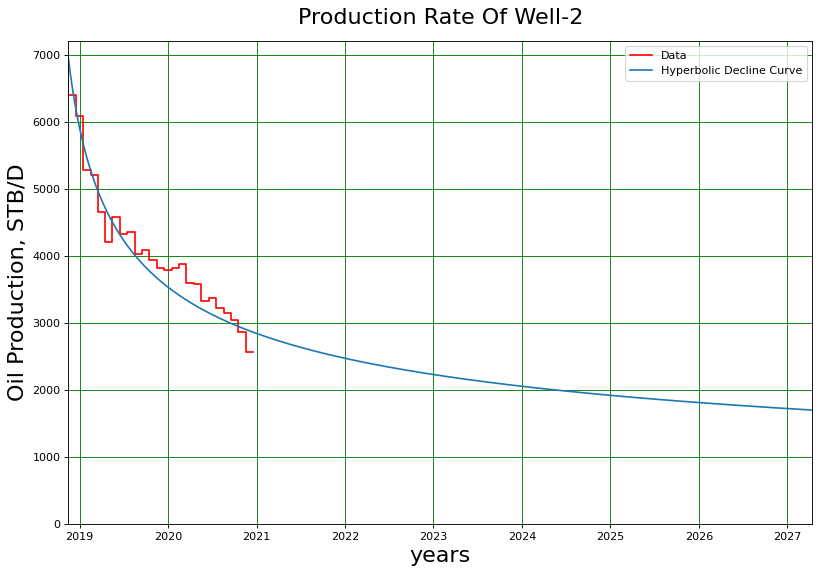

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.step(t2,q2_loc,c="r",label="Data")
plt.plot(t_all2,y2,label="Hyperbolic Decline Curve")
plt.title('Production Rate Of Well-2', size=20, pad=15)
plt.xlabel("years",size=20)
plt.ylabel("Oil Production, STB/D",size=20)
plt.xlim(min(t_all2), max(t_all2)); plt.ylim(ymin=0)
plt.grid(color="g")
plt.legend(loc="best")

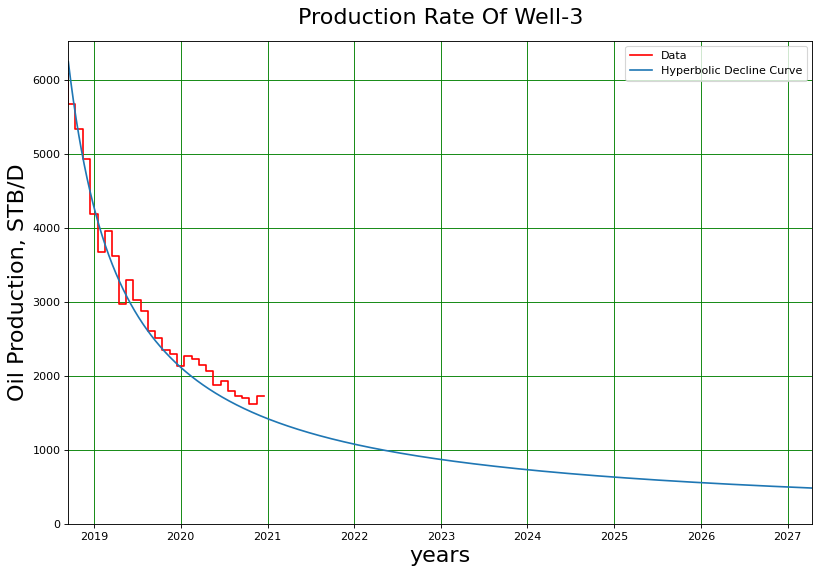

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.step(t3,q3_loc,c="r",label="Data")
plt.plot(t_all3,y3,label="Hyperbolic Decline Curve")
plt.title('Production Rate Of Well-3', size=20, pad=15)
plt.xlabel("years",size=20)
plt.ylabel("Oil Production, STB/D",size=20)
plt.xlim(min(t_all3), max(t_all3)); plt.ylim(ymin=0)
plt.grid(color="g")
plt.legend(loc="best")

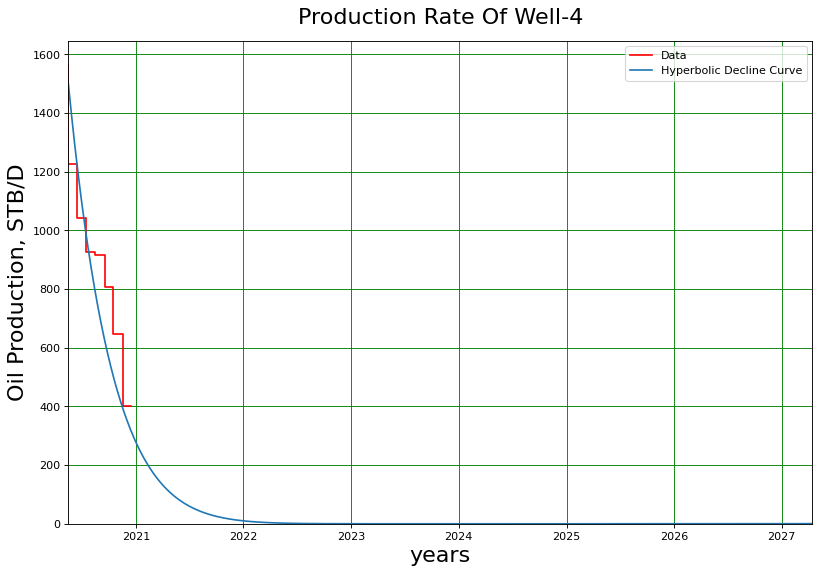

In [ ]:
figure(figsize=(12, 8), dpi=80)
plt.step(t4,q4_loc,c="r",label="Data")
plt.plot(t_all4,y4,label="Hyperbolic Decline Curve")
plt.title('Production Rate Of Well-4', size=20, pad=15)
plt.xlabel("years",size=20)
plt.ylabel("Oil Production, STB/D",size=20)
plt.xlim(min(t_all4), max(t_all4)); plt.ylim(ymin=0)
plt.grid(color="g")
plt.legend(loc="best")

In [ ]:
### CUMULATIVE PRODUCTION BY HYPERBOLIC DECLINE

Np1=[]
for i in y:
  Np1.append(qi / ((1-b)*di)*(1-(y/qi)**(1-b))/1000000)

Np2=[]
for i in y:
  Np2.append(qi2 / ((1-b2)*di2)*(1-(y2/qi2)**(1-b2))/1000000)

Np3=[]
for i in y:
  Np3.append(qi3 / ((1-b3)*di3)*(1-(y3/qi3)**(1-b3))/1000000)

Np4=[]
for i in y:
  Np4.append(qi4 / ((1-b4)*di4)*(1-(y4/qi4)**(1-b4))/1000000)

Forecast of total oil production of Well-1 is 4.817138258101734 MMSTB


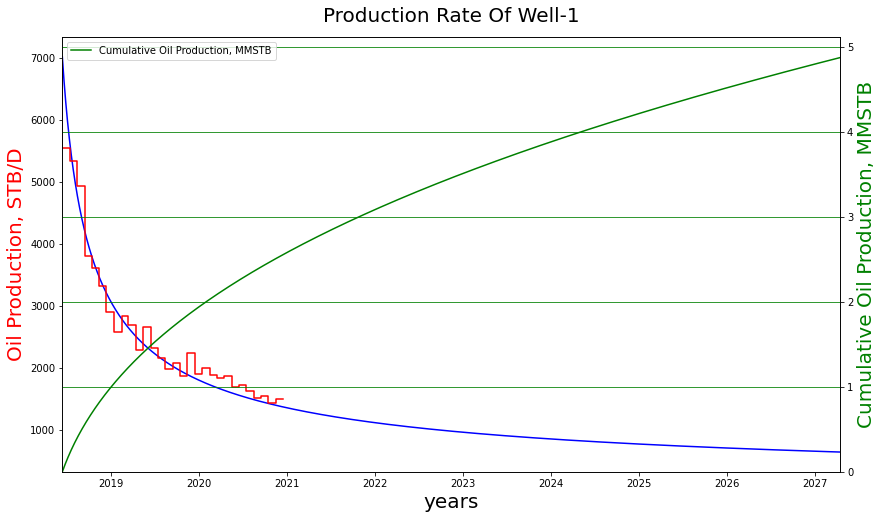

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
fig.subplots_adjust(right=0.8)

twin1 = ax.twinx()

p1, = twin1.plot(t_all1,Np1[0], "g-", label="Cumulative Oil Production, MMSTB")
p2, = ax.plot(t_all1,y, "b-", label="Oil Production, STB/D")
p3, = ax.step(t,q,color="r",label="Data")
plt.title('Production Rate Of Well-1', size=20, pad=15)
ax.set_xlabel("years",size=20)
ax.set_ylabel("Oil Production, STB/D",size=20)
twin1.set_ylabel("Cumulative Oil Production, MMSTB",size=20)
plt.xlim(min(t_all1), max(t_all1)); plt.ylim(ymin=0)
twin1.yaxis.label.set_color(p1.get_color())
ax.yaxis.label.set_color(p2.get_color())
ax.yaxis.label.set_color(p3.get_color())
plt.grid(color="g")
plt.legend(loc="best")
print(f"Forecast of total oil production of Well-1 is {Np1[0][3560]} MMSTB")

Forecast of total oil production of Well-2 is 9.201260667463995 MMSTB


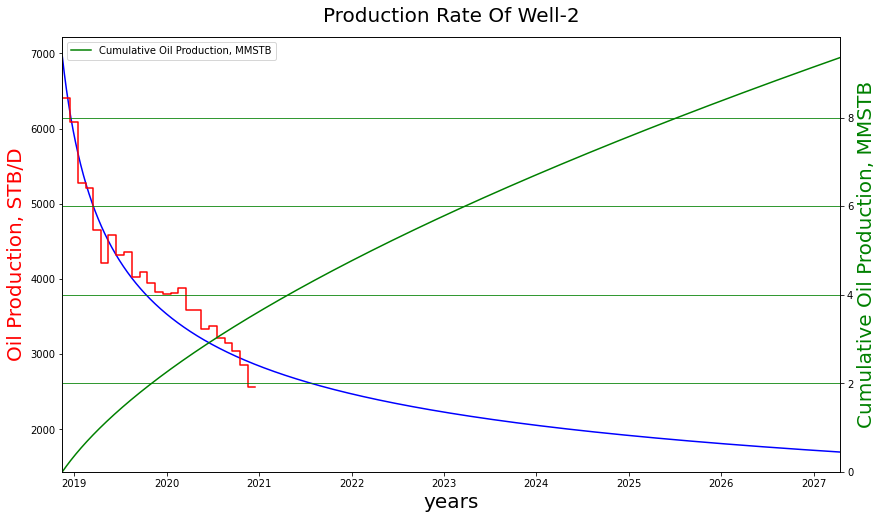

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
fig.subplots_adjust(right=0.8)

twin1 = ax.twinx()

p1, = twin1.plot(t_all2,Np2[0], "g-", label="Cumulative Oil Production, MMSTB")
p2, = ax.plot(t_all2,y2, "b-", label="Oil Production, STB/D")
p3, = ax.step(t,q2,color="r",label="Data")
plt.title('Production Rate Of Well-2', size=20, pad=15)
ax.set_xlabel("years",size=20)
ax.set_ylabel("Oil Production, STB/D",size=20)
twin1.set_ylabel("Cumulative Oil Production, MMSTB",size=20)
plt.xlim(min(t_all2), max(t_all2)); plt.ylim(ymin=0)
twin1.yaxis.label.set_color(p1.get_color())
ax.yaxis.label.set_color(p2.get_color())
ax.yaxis.label.set_color(p3.get_color())
plt.grid(color="g")
plt.legend(loc="best")
print(f"Forecast of total oil production of Well-2 is {Np2[0][3560]} MMSTB")

Forecast of total oil production of Well-3 is 4.684251600946667 MMSTB


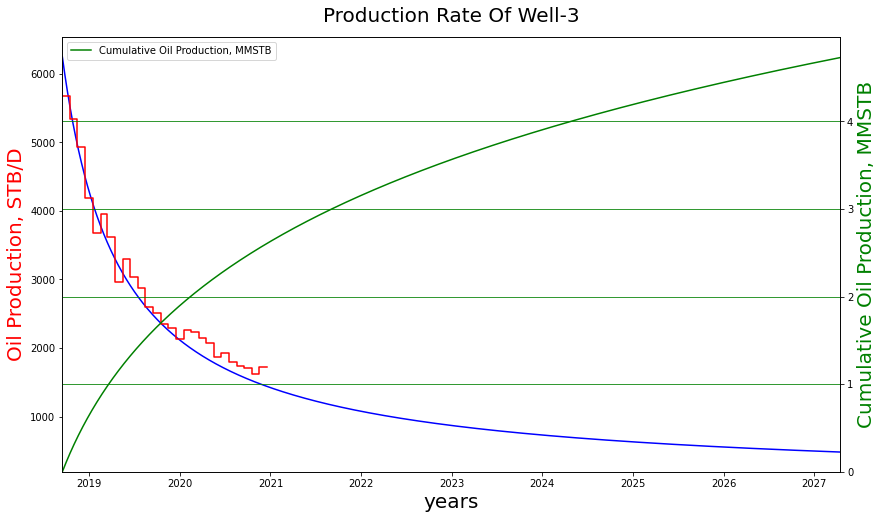

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
fig.subplots_adjust(right=0.8)

twin1 = ax.twinx()

p1, = twin1.plot(t_all3,Np3[0], "g-", label="Cumulative Oil Production, MMSTB")
p2, = ax.plot(t_all3,y3, "b-", label="Oil Production, STB/D")
p3, = ax.step(t,q3,color="r",label="Data")
plt.title('Production Rate Of Well-3', size=20, pad=15)
ax.set_xlabel("years",size=20)
ax.set_ylabel("Oil Production, STB/D",size=20)
twin1.set_ylabel("Cumulative Oil Production, MMSTB",size=20)
plt.xlim(min(t_all3), max(t_all3)); plt.ylim(ymin=0)
twin1.yaxis.label.set_color(p1.get_color())
ax.yaxis.label.set_color(p2.get_color())
ax.yaxis.label.set_color(p3.get_color())
plt.grid(color="g")
plt.legend(loc="best")
print(f"Forecast of total oil production of Well-3 is {Np3[0][3560]} MMSTB")

Forecast of total oil production of Well-4 is 0.291709598995437 MMSTB


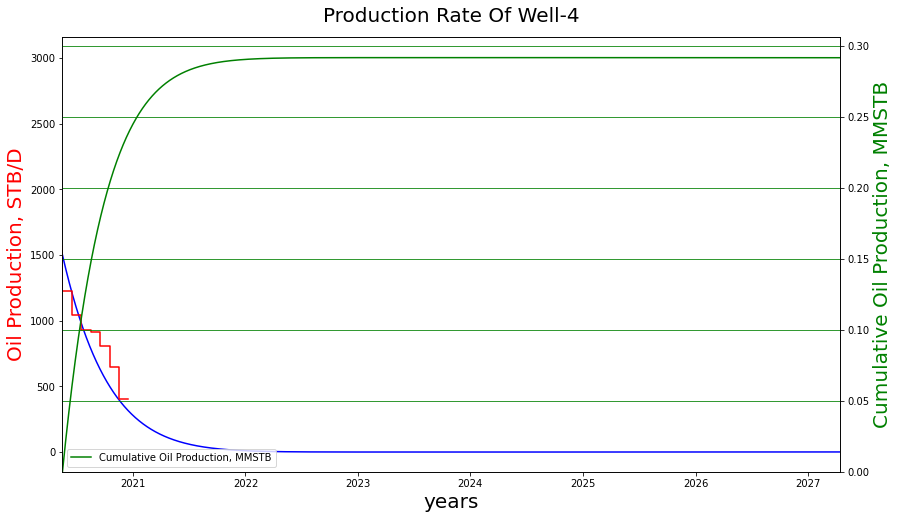

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
fig.subplots_adjust(right=0.8)

twin1 = ax.twinx()

p1, = twin1.plot(t_all4,Np4[0], "g-", label="Cumulative Oil Production, MMSTB")
p2, = ax.plot(t_all4,y4, "b-", label="Oil Production, STB/D")
p3, = ax.step(t,q4,color="r",label="Data")
plt.title('Production Rate Of Well-4', size=20, pad=15)
ax.set_xlabel("years",size=20)
ax.set_ylabel("Oil Production, STB/D",size=20)
twin1.set_ylabel("Cumulative Oil Production, MMSTB",size=20)
plt.xlim(min(t_all4), max(t_all4)); plt.ylim(ymin=0)
twin1.yaxis.label.set_color(p1.get_color())
ax.yaxis.label.set_color(p2.get_color())
ax.yaxis.label.set_color(p3.get_color())
plt.grid(color="g")
plt.legend(loc="best")
print(f"Forecast of total oil production of Well-4 is {Np4[0][3560]} MMSTB")